In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from utils.df_loader import (
    load_adult_df,
    load_compas_df,
    load_german_df,
    load_diabetes_df,
    load_breast_cancer_df,
)
from sklearn.model_selection import train_test_split
from utils.preprocessing import preprocess_df
from utils.models import (
    train_models,
    evaluation_test,
    save_models,
    load_models,
)

from art.attacks.evasion import DeepFool, CarliniL0Method, CarliniLInfMethod, CarliniL2Method, BoundaryAttack, LowProFool, FastGradientMethod, BasicIterativeMethod
from art.estimators.classification import SklearnClassifier, KerasClassifier

from utils.preprocessing import DfInfo
from utils.preprocessing import inverse_dummy
from sklearn.metrics import accuracy_score

seed = 42
# tf.random.set_seed(seed)
# np.random.seed(seed)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None # suppress "SettingWithCopyWarning" warning

In [3]:
TRAIN_MODEL = False # (1)True(2)False
RUN_ART = True
num_instances = 64 # (1)&(2) 20

if RUN_ART:
    tf.compat.v1.disable_eager_execution()

print("TF version: ", tf.__version__)
print("Eager execution enabled: ", tf.executing_eagerly())  # False    

TF version:  2.10.0
Eager execution enabled:  False


In [4]:
#### Select dataset ####
for dataset_name in [
    # "adult",
    # "german",
    #  "compas",
    # "diabetes",
    "breast_cancer",
]:  # [adult, german, compas]
    print(f"Dataset Name: [{dataset_name}]")
    if dataset_name == "adult":
        dataset_loading_fn = load_adult_df
    elif dataset_name == "german":
        dataset_loading_fn = load_german_df
    elif dataset_name == "compas":
        dataset_loading_fn = load_compas_df
    elif dataset_name == "diabetes":
        dataset_loading_fn = load_diabetes_df
    elif dataset_name == "breast_cancer":
        dataset_loading_fn = load_breast_cancer_df
    else:
        raise Exception("Unsupported dataset")

    df_info = preprocess_df(dataset_loading_fn)

    train_df, test_df = train_test_split(
        df_info.dummy_df, train_size=0.8, random_state=seed, shuffle=True
    )
    X_train = np.array(train_df[df_info.ohe_feature_names])
    y_train = np.array(train_df[df_info.target_name])
    X_test = np.array(test_df[df_info.ohe_feature_names])
    y_test = np.array(test_df[df_info.target_name])



Dataset Name: [breast_cancer]


In [5]:
### Load models
models = load_models(X_train.shape[-1], dataset_name)


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [6]:
num_instances = 64 # (1)&(2) 20

X_test_re=X_test[0:num_instances]
y_test_re=y_test[0:num_instances]

In [7]:

# attack = BasicIterativeMethod(estimator=SklearnClassifier(models['svc'], clip_values=(0,1)), batch_size=64, norm=1)
attack = BasicIterativeMethod(estimator=KerasClassifier(models['nn_2'], clip_values=(0,1)), batch_size=64)

In [8]:
x_adv = attack.generate(X_test_re) 

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
# predictions = models['svc'].predict(x_adv)
predictions = models['nn_2'].predict(x_adv).argmax(axis=1).flatten().astype(int)

In [10]:
accuracy_score(predictions, y_test_re)

0.03125

In [90]:
weights = models['lr'].coef_

In [40]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="total_bill", y="day", orientation='h')
fig.show()

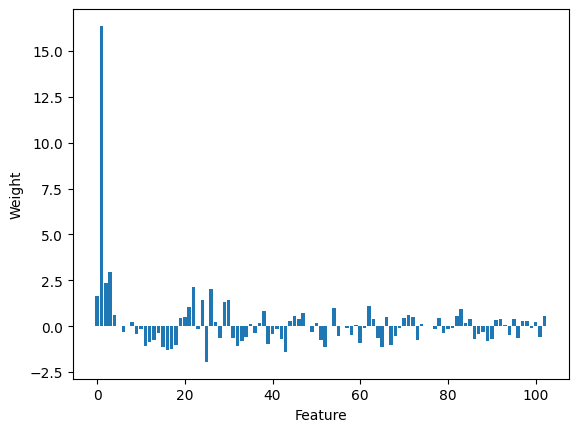

In [23]:
import matplotlib.pyplot as plt
# plot the weights
plt.bar(range(len(weights[0])), weights[0])
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

In [31]:
df_info.dummy_df.head(10)


,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class
0,0.301370,0.021740,0.0,0.397959,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.000000,0.0,0.122449,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.438356,0.000000,0.0,0.153061,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.479452,0.000000,0.0,0.448980,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,0.191781,0.140841,0.0,0.500000,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0.342466,0.051781,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
